In [1]:
#导入相关库
import os
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score

In [2]:
#预处理

#Training
dir_path = 'D:\\assignment1\\Assignment 1--MNIST by SVM\\Assignment 1--MNIST by SVM\\MNIST\\train'   #Please specify your data directory. 
file_ls = os.listdir(dir_path)
data = np.zeros((60000, 784), dtype=float)
label = np.zeros((60000, 10), dtype=float)
flag = 0
for dir in file_ls:
    files = os.listdir(dir_path+'\\'+dir)
    for file in files:
        filename = dir_path+'\\'+dir+'\\'+file
        img = mpimg.imread(filename)
        data[flag,:] = np.reshape(img, -1)/255
        label[flag,int(dir)] = 1.0
        flag+=1
ratioTraining = 0.95
xTraining, xValidation, yTraining, yValidation = train_test_split(data, label, test_size=1 - ratioTraining, random_state=0)  # split the training data into 95% for training and 5% for validation. 

#Testing
dir_path = 'D:\\assignment1\\Assignment 1--MNIST by SVM\\Assignment 1--MNIST by SVM\\MNIST\\test'
file_ls = os.listdir(dir_path)
xTesting = np.zeros((10000, 784), dtype=float)
yTesting = np.zeros((10000, 10), dtype=float)
flag = 0
for dir in file_ls:
    files = os.listdir(dir_path+'\\'+dir)
    for file in files:
        filename = dir_path+'\\'+dir+'\\'+file
        img = mpimg.imread(filename)
        xTesting[flag,:] = np.reshape(img, -1)/255
        yTesting[flag,int(dir)] = 1.0
        flag+=1

In [3]:
# 训练SVM模型
svm_model = SVC(kernel='rbf' , gamma='auto')
svm_model.fit(xTraining, np.argmax(yTraining, axis=1))

SVC(gamma='auto')

In [4]:
# 验证模型
y_validation_pred = svm_model.predict(xValidation)
validation_accuracy = accuracy_score(np.argmax(yValidation, axis=1), y_validation_pred)
print(f"验证集准确率: {validation_accuracy}")

验证集准确率: 0.9356881039653449


In [5]:
# 测试模型
y_testing_pred = svm_model.predict(xTesting)

In [6]:
# 计算准确度
accuracy = accuracy_score(np.argmax(yTesting, axis=1), y_testing_pred)
print(f"测试集准确率: {accuracy}")

测试集准确率: 0.9445


In [7]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(np.argmax(yTesting, axis=1), y_testing_pred)
print(f"混淆矩阵: \n{conf_matrix}")

混淆矩阵: 
[[ 968    0    2    0    0    5    3    1    1    0]
 [   0 1120    2    3    0    1    3    1    5    0]
 [   9    1  957   10   10    1   13   12   17    2]
 [   1    0   15  951    1   16    1    9   12    4]
 [   1    1    7    0  937    0    7    2    2   25]
 [   7    4    5   29    7  811   12    2   10    5]
 [   9    3    4    1    5    8  927    0    1    0]
 [   2   12   22    5    8    0    0  958    3   18]
 [   4    6    7   15    8   24   10    6  891    3]
 [   9    7    0   12   30    6    1   13    6  925]]


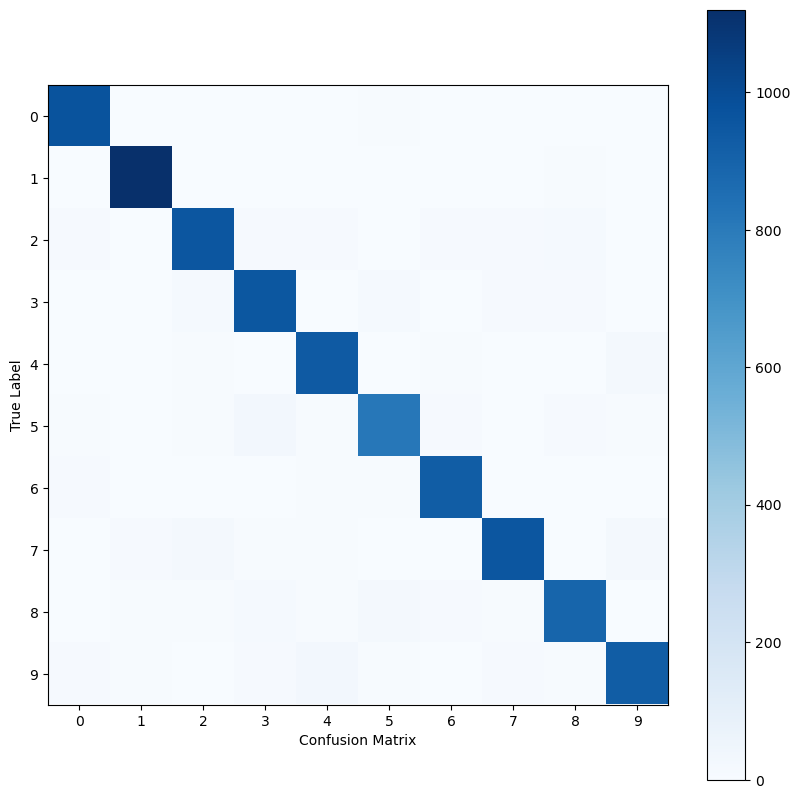

In [8]:
# 绘制混淆矩阵
plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xlabel('Confusion Matrix')
plt.show()

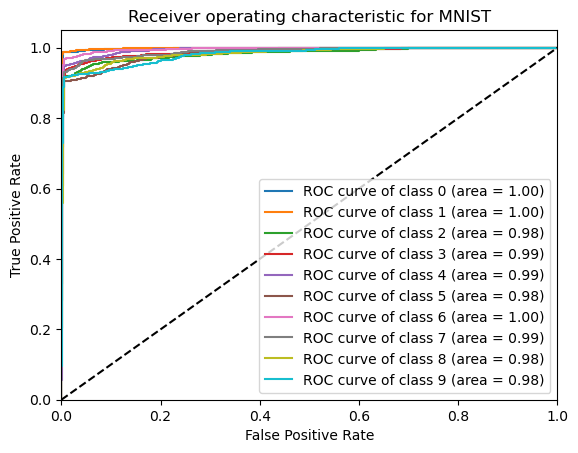

In [9]:
# 计算ROC曲线和AUC值
y_testing_bin = yTesting  # 已经是二值化标签
n_classes = y_testing_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_testing_bin[:, i], svm_model.decision_function(xTesting)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制ROC曲线
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for MNIST')
plt.legend(loc="lower right")
plt.show()